<a href="https://colab.research.google.com/github/marcgym2/MachineLearning/blob/main/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
# Permite mostrar markdown como saliuda en Jupyter
from IPython.display import Markdown

from google.colab import drive
drive.mount("/content/drive")

import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [2]:
df_measures = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/measures_v2.csv")


# Tarea:

- Calcula estadísticos descriptivos básicos para tus datos
- Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma
- Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación
- Presenta tus resultados gráficamente

## Estadísticas descriptivas en Python

- u_q: Medición del componente q de tensión en coordenadas dq (en V)

- coolant: Temperatura del refrigerante (en °C)

- stator_winding: Temperatura del devanado del estator (en °C) medida con termopares

- u_d: Voltage  medición del componente d en coordenadas dq

- stator_tooth: Temperatura del diente del estator (en °C) medida con termopares

- motor_speed: Velocidad del motor (en rpm)

- i_d: Current medición del componente d en coordenadas dq

- i_q: Current medición del componente q en coordenadas dq

- pm: Temperatura de imán permanente (en °C) medida con termopares y transmitida de forma inalámbrica a través de una unidad de termografía.

- stator_yoke: Temperatura del yugo del estator (en °C) medida con termopares

In [47]:
df_measures

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


### describe()
Genera estadísticas descriptivas.

Las estadísticas descriptivas incluyen aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores de NaN.

In [22]:
df_measures.describe().T

,count,mean,std,min,25%,50%,75%,max
u_q,1330816.0,54.279005,44.173234,-25.290930,12.069925,48.938181,90.034393,133.036994
coolant,1330816.0,36.229995,21.786149,10.623751,18.698135,26.900141,49.857487,101.598512
stator_winding,1330816.0,66.342745,28.672061,18.585815,42.787957,65.110129,88.141137,141.362885
u_d,1330816.0,-25.133809,63.091972,-131.530411,-78.690904,-7.429755,1.470271,131.469788
stator_tooth,1330816.0,56.878582,22.952233,18.133976,38.416012,56.036345,75.586682,111.946423
motor_speed,1330816.0,2202.080728,1859.663350,-275.549144,317.110665,1999.976685,3760.639058,6000.015137
i_d,1330816.0,-68.716810,64.933233,-278.003632,-115.406060,-51.093763,-2.979688,0.051897
i_q,1330816.0,37.412782,92.181880,-293.426793,1.095863,15.774007,100.612150,301.707855
pm,1330816.0,58.506776,19.001498,20.856956,43.151582,60.266287,72.008371,113.606628
stator_yoke,1330816.0,48.187965,19.991004,18.076689,31.990333,45.625509,61.460828,101.147964


###  df_measures.skew()
Un valor inferior a -1 está sesgado hacia la izquierda; mayor que 1 está sesgado a la derecha. Un valor entre -1 y 1 es simétrico.

In [20]:
df_measures.skew()

u_q               0.314933
coolant           1.048115
stator_winding    0.167666
u_d               0.145061
stator_tooth      0.137610
motor_speed       0.386464
i_d              -0.707305
i_q              -0.146505
pm                0.038312
stator_yoke       0.481009
ambient          -0.349066
torque           -0.127141
profile_id       -0.002905
dtype: float64

La sesíon 20 (Profile_id) es la que tiene mayor numero de datos registrados.

In [61]:
# Obteniendo la sesión con mayor número de horas de datos con la función de moda. 
df_measures['profile_id'].mode()

0    20
dtype: int64

Text(0.5, 0, 'Duración (hr)')

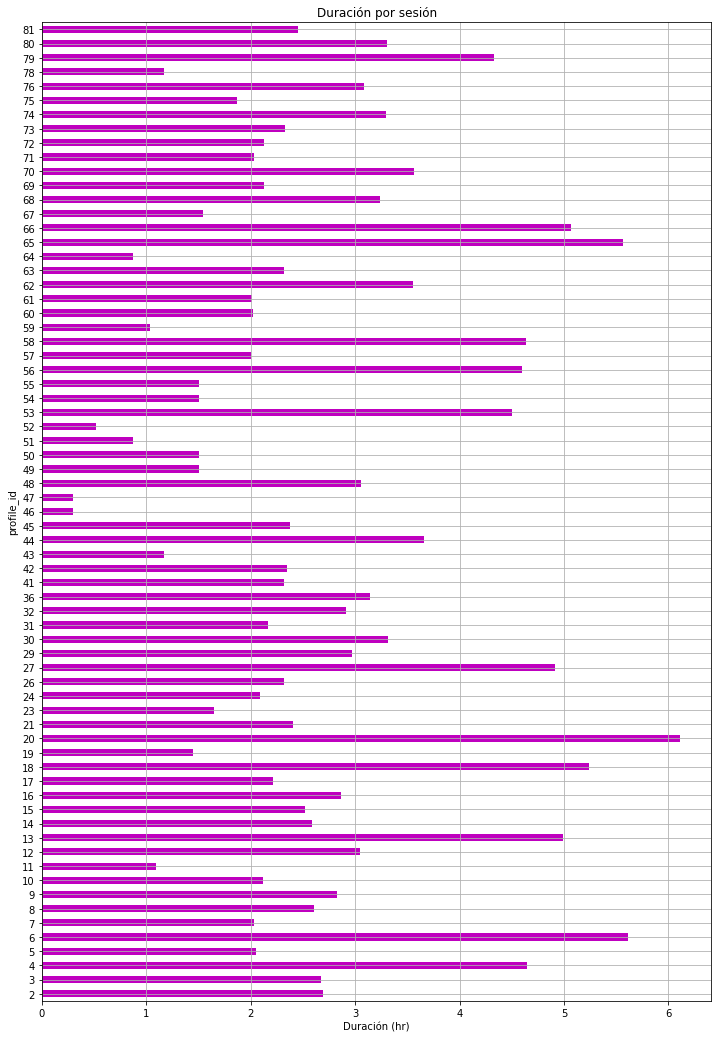

In [80]:
sesiones = df_measures.groupby('profile_id').agg('count')['u_d'] / (2 * 3600)
sesiones.plot.barh(figsize=(12,18), grid='both', title='Duración por sesión', color='m')
plt.xlabel('Duración (hr)')

## Matriz de correlación

In [36]:
corr = df_measures.corr()
corr.style.background_gradient(cmap='RdBu_r')

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
u_q,1.000000,0.051721,0.050610,0.004702,0.104373,0.683556,-0.100357,-0.124589,0.122365,0.090992,0.150264,-0.136215,-0.030499
coolant,0.051721,1.000000,0.504835,0.195517,0.674974,0.011872,0.074865,-0.256389,0.467117,0.860750,0.525963,-0.257982,0.635797
stator_winding,0.050610,0.504835,1.000000,-0.234950,0.970135,0.432034,-0.624370,0.065617,0.795893,0.860268,0.333208,0.095510,0.340580
u_d,0.004702,0.195517,-0.234950,1.000000,-0.142749,-0.288472,0.448331,-0.723069,-0.172031,-0.008098,0.203647,-0.753779,0.263264
stator_tooth,0.104373,0.674974,0.970135,-0.142749,1.000000,0.398431,-0.487062,-0.042294,0.832084,0.953115,0.443470,-0.018413,0.450821
motor_speed,0.683556,0.011872,0.432034,-0.288472,0.398431,1.000000,-0.700609,-0.068881,0.458947,0.255790,0.118232,-0.043903,-0.028585
i_d,-0.100357,0.074865,-0.624370,0.448331,-0.487062,-0.700609,1.000000,-0.231344,-0.427736,-0.278005,0.016397,-0.274097,0.053524
i_q,-0.124589,-0.256389,0.065617,-0.723069,-0.042294,-0.068881,-0.231344,1.000000,-0.142416,-0.131466,-0.314044,0.996457,-0.324654
pm,0.122365,0.467117,0.795893,-0.172031,0.832084,0.458947,-0.427736,-0.142416,1.000000,0.756684,0.513728,-0.117138,0.386241
stator_yoke,0.090992,0.860750,0.860268,-0.008098,0.953115,0.255790,-0.278005,-0.131466,0.756684,1.000000,0.520382,-0.117118,0.563437


Elementos ordenados en descendente de acuerdo con su correlación



In [28]:
import numpy as np
corr_matrix = df_measures.corr().abs()


sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

corr_matrix
sol

i_q             torque          0.996457
stator_winding  stator_tooth    0.970135
stator_tooth    stator_yoke     0.953115
coolant         stator_yoke     0.860750
stator_winding  stator_yoke     0.860268
                                  ...   
stator_tooth    torque          0.018413
i_d             ambient         0.016397
coolant         motor_speed     0.011872
u_d             stator_yoke     0.008098
u_q             u_d             0.004702
Length: 78, dtype: float64

## Prueba de Hipótesis


Ho: Hay correlación/asociación entre las dos variables.


Ha: No hay correlación/asociación entre las dos variables.

In [85]:

#  Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df_measures['stator_winding']
data2 = df_measures['stator_tooth']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Se rechaza la hipotesis nula, con 95% de confianza, no hay correlación entre las variables')
else:
 print('No se rechaza la hipotesis nula, con 95% de confianza, hay correlación entre las variables')

stat=0.970, p=0.000
No se rechaza la hipotesis nula, con 95% de confianza, hay correlación entre las variables


r=0.970, Pearson's Correlation test


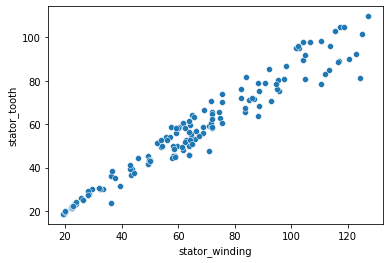

In [84]:
sns.scatterplot(x="stator_winding", y="stator_tooth", data=df_measures.sample(150));
print("r=0.970, Pearson's Correlation test")